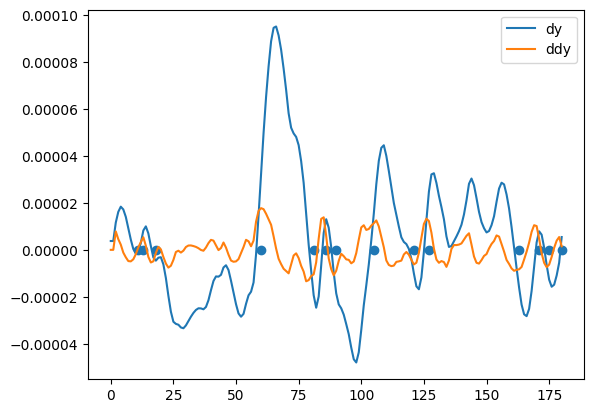

In [ ]:
import matplotlib.pyplot as plt
import forex as fx
import json
import numpy as np

q = open("data.json")
f = json.load(q)
q.close()

y = fx.min("EUR_USD").to_numpy()[0][:,2]
# y = fx.algo.smooth_ma(y)[800:1000]
y = fx.smooth_ma(np.array(f['y'])[:200])
# plt.plot(y)
dy = fx.deriv(y)
ddy = fx.deriv(dy)
plt.plot(dy,label="dy")
plt.plot(ddy,label="ddy")
plt.legend()
seg = ddy - dy

# collision,tcollision = [], []

# for i in range(1,len(dy)):
#     if seg[i-1] > 0 and seg[i] < 0 or seg[i-1] < 0 and seg[i] > 0:
#         collision.append(0)
#         tcollision.append(i)
        



# plt.scatter(tcollision,collision)

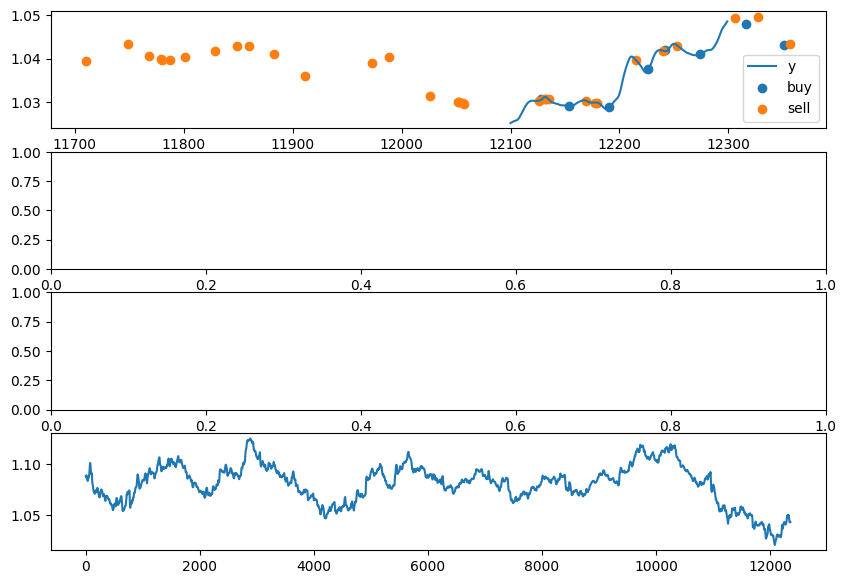

In [24]:
import json
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import LineString
from shapely import Point, MultiPoint, Polygon, MultiPolygon
from utils_old import smooth_ma, deriv
import forex as fx

# q = open("data.json")
# f = json.load(q)
# q.close()
# y = smooth_ma(np.array(f['y'])[:200])

q = fx.hr("EUR_USD").to_numpy()[0][:,2]
y = smooth_ma(q)




dy = deriv(y)
ddy = deriv(dy)

buy,sell,tbuy,tsell = fx.algo.deriv12(y,raw_data=True)


fig, axis = plt.subplots(4,1, figsize=(10,7))

sp = 12100
se = 12300

axis[0].plot(np.arange(sp,se),y[sp:se],label='y')
# axis[0].plot((dy + y.mean())[sp:se],label='dy')
# axis[0].plot((ddy + y.mean())[sp:se],label='ddy')

s = 450
e = 999999
axis[0].scatter(tbuy[s:e],buy[s:e], label='buy')
axis[0].scatter(tsell[s:e],sell[s:e], label='sell')
axis[0].legend()

axis[3].plot(y )



In [1]:
def algo_helper(arr, raw_data=False):
    smoothArr = smooth_ma(arr)
    y = smoothArr
    dy = deriv(y)
    ddy = deriv(dy)

    buy = []
    sell = []
    tbuy = []
    tsell = []
    roots = np.array([0])

    

    for i in range(1, len(arr)-1):
        y = smoothArr[:i + 1]
        dy = deriv(y)
        ddy = deriv(dy)

        np.append(roots, abs(ddy[i] - dy[i]))
        if abs(ddy[i-1] - dy[i-1]) < 1e-6:

            if (dy[i-1] < 0):
                sell.append(y[i])
                tsell.append(i)
            else:
                buy.append(y[i])
                tbuy.append(i)
    if raw_data:
        return buy, sell, tbuy, tsell
    if len(tbuy) == 0 or len(tsell) == 0:
        return 1
    elif tbuy[-1] > tsell[-1]:
        return 1
    else:
        return -1
    
buy,sell,tbuy,tsell = algo_helper(y,True)
plt.plot(y)
plt.scatter(tbuy, buy)
plt.scatter(tsell,sell)

NameError: name 'y' is not defined

194
5
25
45
65
85
105
125
145
165


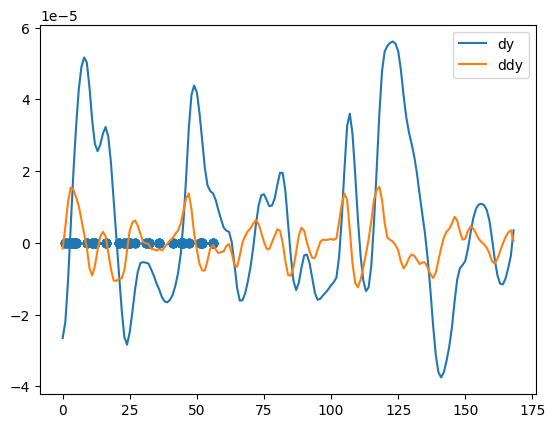

In [64]:
def get_intersection_points(arr1, arr2, tol=1e-8):
    x1, y1 = np.arange(0, len(arr1)), arr1
    x2, y2 = np.arange(0, len(arr2)), arr2

    # Create LineString objects with the full range of points
    line1 = LineString([(x1[i], y1[i]) for i in range(len(x1))])
    line2 = LineString([(x2[i], y2[i]) for i in range(len(x2))])

    # Buffer to allow for a small tolerance
    buffered_line1 = line1.buffer(tol)
    buffered_line2 = line2.buffer(tol)

    # Compute intersection
    intersection = buffered_line1.intersection(buffered_line2)
    
    points = []

    if not intersection.is_empty:
        if isinstance(intersection, Point):
            points.append((intersection.x, intersection.y))
        elif isinstance(intersection, MultiPoint):
            points = [(p.x, p.y) for p in intersection]
        elif isinstance(intersection, Polygon):
            # If the intersection is a polygon, extract points from its boundary
            points = [(x, y) for x, y in intersection.exterior.coords]
        elif isinstance(intersection, MultiPolygon):
            # If the intersection is a MultiPolygon, iterate through each polygon
            for polygon in intersection.geoms:
                points.extend([(x, y) for x, y in polygon.exterior.coords])
        else:
            print(f"Unhandled intersection type: {type(intersection)}")
    else:
        print("No collision detected.")
    
    return points

s = 25
e = 400
dy = deriv(y).copy()
ddy = deriv(deriv(y)).copy()
plt.plot(dy[s:e],label="dy")
plt.plot(ddy[s:e],label="ddy")
plt.legend()

collisions = []
timeColide = []
seg = ddy-dy

# Arrays for two discrete sets of points
# Create lines
print(len(dy))
for i in range(5,len(dy)-21,20):
    print(i)
    points = get_intersection_points(dy[i:i+62],ddy[i:i+62])
    for j in points:
        collisions.append(0)
        timeColide.append(int(j[0]))



# plt.plot(seg)
ss = 0
ee = 200
plt.scatter(timeColide[ss:ee],collisions[ss:ee])
# plt.plot(seg[s:e])
# timeColide,collisions



In [133]:
!pip install shapely


   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------------------------------------ --- 1.3/1.4 MB 22.3 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 18.7 MB/s eta 0:00:00


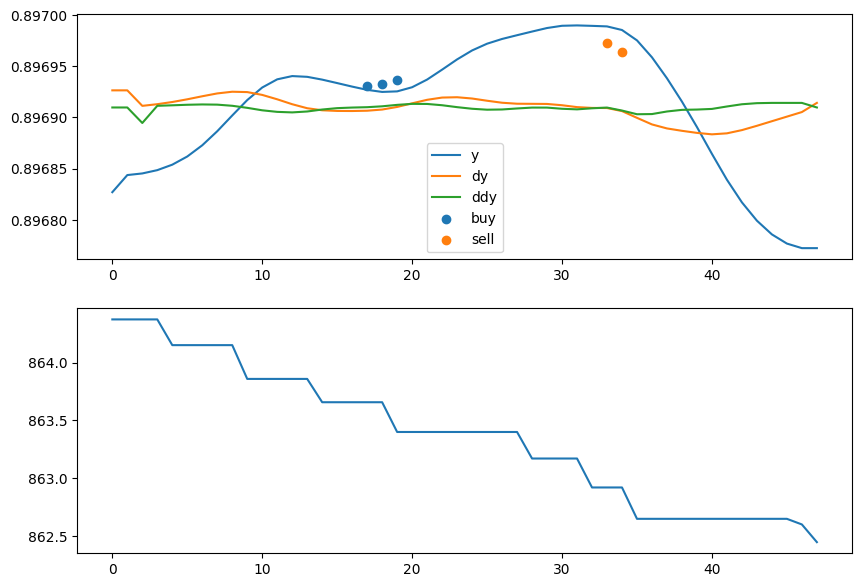

In [13]:


def algo_derivt(arr):
    smoothArr = smooth_ma(arr)
    y = smoothArr
    dy = deriv(y)
    ddy = deriv(dy)

    buy = []
    sell = []
    tbuy = []
    tsell = []
    roots = np.array([0])

    

    for i in range(1, len(arr)-1):
        y = smoothArr[:i + 1]
        dy = deriv(y)
        ddy = deriv(dy)

        np.append(roots, abs(ddy[i] - dy[i]))
        if abs(ddy[i-2] - dy[i-2]) < 1e-6:

            if (dy[i-1] < 0):
                sell.append(y[i])
                tsell.append(i)
            else:
                buy.append(y[i])
                tbuy.append(i)

    return buy, sell, tbuy, tsell
    # if tbuy[-1] > tsell[-1]:
    #     return 1
    # else:
    #     return -1

buy,sell,tbuy,tsell = algo_derivt(y)

# fig, axis = plt.subplots(4,1, figsize=(10,7))
fig, axis = plt.subplots(2,1, figsize=(10,7))
axis[1].plot(np.array(bal))


axis[0].plot(y,label='y')
axis[0].plot((dy + y.mean()),label='dy')
axis[0].plot((ddy + y.mean()),label='ddy')

s = 0
e = 100
axis[0].scatter(tbuy[s:e],buy[s:e], label='buy')
axis[0].scatter(tsell[s:e],sell[s:e], label='sell')
axis[0].legend()

# axis[3].plot(y )

- Setup environment for rllib
    * observation space
    * 

# Explination
idk i methheaded this up

if \
$y''-y' = 0$

that means collision, and thus check $y'$ to see direction it is going. Make sure to take smooth_ma, or the smooth mean average to scooth it for the derivative.

now if\
$y_i' < 0, sell$\
else\
$y_i' >= 0, buy$

It seems to work, waiting for market to open, and to check the ideal time interval to maximise profits.

np.int64(4)